### 

# Deep L‑Layer Neural Network From Scratch

### Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from DNN import DNN
from tensorflow.keras.datasets import cifar10
%matplotlib inline

### Importing the dataset

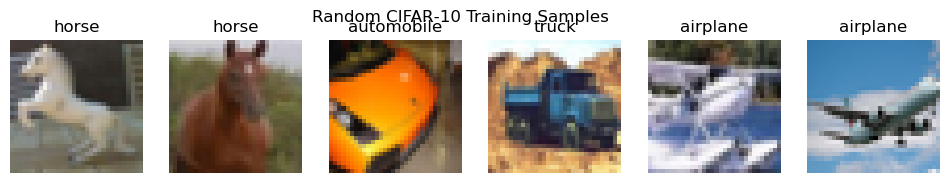

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flattening the labels to 1D
y_train = y_train.flatten()   # shape now (50000,)
y_test  = y_test.flatten()    # shape now (10000,)

# Class labels
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Previewing images
preview_n = 6
idxs = np.random.choice(len(X_train), preview_n, replace=False)
fig, axes = plt.subplots(1, preview_n, figsize=(preview_n*2,2))
for ax, idx in zip(axes, idxs):
    ax.imshow(X_train[idx])
    label = int(y_train[idx])  # now a Python int
    ax.set_title(class_names[label])
    ax.axis("off")
plt.suptitle("Random CIFAR‑10 Training Samples")
plt.show()

In [7]:
# Print out all the class index 
print("CIFAR‑10 classes:")
class_dict = {} 
for i, name in enumerate(class_names):
    class_dict[i] = name
print(class_dict)

CIFAR‑10 classes:
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [8]:
# User's choice to which label to predict
choice = input("\nEnter the name of the class you want to predict (e.g. 'cat'): ").strip().lower()
if choice not in class_names:
    raise ValueError(f"Invalid choice '{choice}'. Must be one of {class_names}")
target_label = class_names.index(choice)
print(f"> You chose to predict '{choice}' (numeric label = {target_label})")

> You chose to predict 'cat' (numeric label = 3)


### Processing the data

In [9]:
# Filtering and binarizing
Y_train = (y_train == target_label).astype(int).reshape(1, -1)  # shape (1, 50000)
Y_test  = (y_test  == target_label).astype(int).reshape(1, -1)

# Flatten & normalize images
N_train, H, W, C = X_train.shape
N_test  = X_test.shape[0]
X_train_flat = X_train.reshape(N_train, H*W*C).T / 255.0  # shape (H*W*C, 50000)
X_test_flat  = X_test.reshape(N_test,  H*W*C).T / 255.0  # shape (H*W*C, 10000)

# Taking a sample of 10000 images for training and 5000 images for testing
X_train_sample = X_train_flat[:, :10000]
X_test_sample = X_test_flat[:, :5000]
Y_train_sample = Y_train[:, :10000]
Y_test_sample = Y_test[:, :5000]

print(f"X_train_sample: {X_train_sample.shape}, Y_train: {Y_train_sample.shape}")
print(f"X_test_sample:  {X_test_sample.shape},  Y_test:  {Y_test_sample.shape}")



X_train_sample: (3072, 10000), Y_train: (1, 10000)
X_test_sample:  (3072, 5000),  Y_test:  (1, 5000)


### Training the Nueral Network

In [10]:
# Example DNN config for 3-layer NN
# Layer dimensions: Inputs --> hidden layer --> hidden layer --> ..... --> output layer
layers = [X_train_sample.shape[0], 64, 32, 1]  # input, 2 hidden layers, 1 output

model = DNN(layers_dim=layers)

# Train the model
parameters, costs = model.train(X_train_sample, Y_train_sample, 
                                 task="classification",
                                 epochs=1000,
                                 learning_rate=0.01,
                                 hidden_activation="relu",
                                 final_activation="sigmoid",
                                 print_cost=True)


The Cost of 0 Epoch is 0.6931109241961282
The Cost of 100 Epoch is 0.5663751141898649
The Cost of 200 Epoch is 0.4822643935940836
The Cost of 300 Epoch is 0.3738219294077173
The Cost of 400 Epoch is 0.3278057472999503
The Cost of 500 Epoch is 0.32706362807409406
The Cost of 600 Epoch is 0.3265129187228255
The Cost of 700 Epoch is 0.32597481592305066
The Cost of 800 Epoch is 0.32544373477874194
The Cost of 900 Epoch is 0.3249151374081949


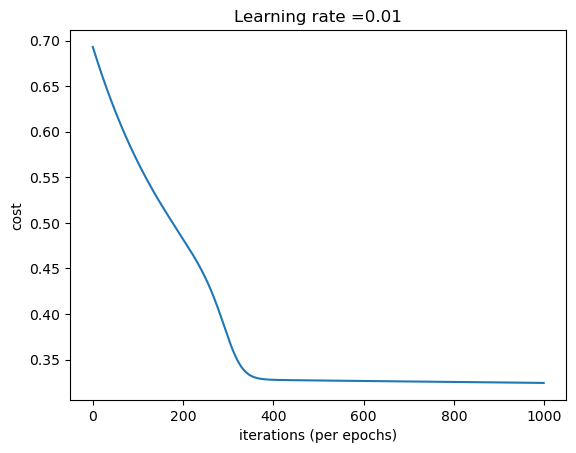

In [11]:
# Plotting Cost Vs. Epochs
model.plot_costs(learning_rate = 0.01)

In [12]:
# Predicting using the trained weights
AL = model.predict(X_test_sample)
y_true  = Y_test_sample.ravel()                
y_pred  = AL.ravel()
accuracy = float((AL == Y_test_sample).mean()) *100
print(f"Test accuracy: {accuracy:.2f}%")

Test accuracy: 90.06%
